# IMDB Score Final Project Clustering Analysis

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."
Jessica Davis

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [2]:
#Set Display Format
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#remove warnings to keep dataset clean
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read dataset
df = pd.read_csv('data/imdb_transformed')

In [5]:
#preview dataset
df.head(2)

,Unnamed: 0,duration,budget,imdb_score,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War,actor_popularity,director_popularity
0,0,178.0,237000000.0,7.9,0,0,1,0,0,0,0,0,3,1
1,1,169.0,300000000.0,7.1,0,0,1,0,0,0,0,0,6,4


In [6]:
#simplify clustering by removing irrelevant variables
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['G'], axis=1)
df = df.drop(['PG'], axis=1)
df = df.drop(['PG-13'], axis=1)
df = df.drop(['R'], axis=1)
df = df.drop(['Bio_Hist_Doc_War'], axis=1)
df = df.drop(['Comedy'], axis=1)
df = df.drop(['Thrill_Horror'], axis=1)
df = df.drop(['Drama'], axis=1)

In [7]:
#create IMDB score categories
df['imdb_cat'] = 4
df['imdb_cat'][df['imdb_score'] > 8] = 4
df['imdb_cat'][(df['imdb_score'] >6 ) & (df['imdb_score'] < 8)] = 3
df['imdb_cat'][(df['imdb_score'] >4 ) & (df['imdb_score'] < 6)] = 2
df['imdb_cat'][df['imdb_score'] < 4] = 1

In [8]:
#remove IMDB scores
df = df.drop(['imdb_score'], axis=1)

In [9]:
#preview simplified dataset
df.head(2)

,duration,budget,actor_popularity,director_popularity,imdb_cat
0,178.0,237000000.0,3,1,3
1,169.0,300000000.0,6,4,3


## Clustering Methods

* K-means groups data into categories based on Euclidean distance
* Hiearchical Clustering bases clustering on hiearchy and ranking of variables

## K-Means

Kmeans is a method that will put the movies into clusters based on the variables in our dataset. First the varience of the data must be tested to see if it needs to be normalized.

In [10]:
# test varience variance test
df.var()

duration               5.096398e+02
budget                 4.447239e+16
actor_popularity       1.575430e+00
director_popularity    8.277584e-01
imdb_cat               4.153847e-01
dtype: float64

In [11]:
#normalize the data
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

,duration,budget,actor_popularity,director_popularity,imdb_cat
0,0.221799,0.016030,-0.058066,-0.447034,0.075544
1,0.192767,0.021188,0.541934,0.552966,0.075544
2,0.125025,0.016685,0.141934,-0.447034,0.075544
3,0.176638,0.017095,0.541934,0.552966,0.408878
4,0.073412,0.018216,-0.058066,0.219632,0.075544


In [12]:
#run the kmeans model
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [13]:
#fit the model
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [14]:
#show cluster labels
k_means.labels_

array([3, 1, 3, ..., 0, 0, 0])

In [15]:
#show cluster centers
k_means.cluster_centers_

array([[-8.24044959e-03, -8.33033112e-04, -2.34374545e-01,
        -9.99269492e-02,  1.13193492e-01],
       [ 2.37413155e-02,  1.44412561e-03,  1.23946190e-01,
         3.57081466e-01,  7.42739474e-02],
       [-3.68677194e-02, -1.24696340e-03, -1.05655749e-01,
        -9.01113103e-02, -3.01207864e-01],
       [ 1.43900418e-02,  2.38526204e-04,  2.04420933e-01,
        -2.84024983e-01,  7.62408940e-02]])

In [16]:
#display cluster columns
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,3
1,1
2,3
3,1
4,1


We can now check to see if 4 clusters is indeed the appropriate amount of clusters to use using the "elbow" method

Text(0.5,1,'Selecting k with the Elbow Method')

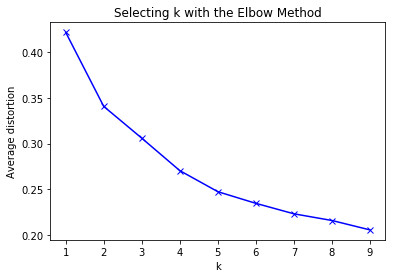

In [17]:
#run the elbow method
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

* This graph suggests that 3 or 4 is a good value for k
* There is little improvement as we move greater than 4.

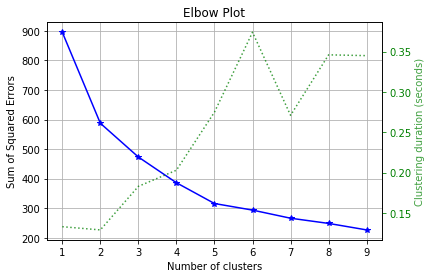

In [18]:
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=range(1, 10))

* 3 appears to be the best value to use when selecting the amount of clusters

Now we can view the dataset with the cluster labels

In [19]:
#join the cluster column and our dataset
df2 = df_norm.join(df1)
df2.head()

,duration,budget,actor_popularity,director_popularity,imdb_cat,cluster
0,0.221799,0.016030,-0.058066,-0.447034,0.075544,3
1,0.192767,0.021188,0.541934,0.552966,0.075544,1
2,0.125025,0.016685,0.141934,-0.447034,0.075544,3
3,0.176638,0.017095,0.541934,0.552966,0.408878,1
4,0.073412,0.018216,-0.058066,0.219632,0.075544,1


The clusters can also be visualized.

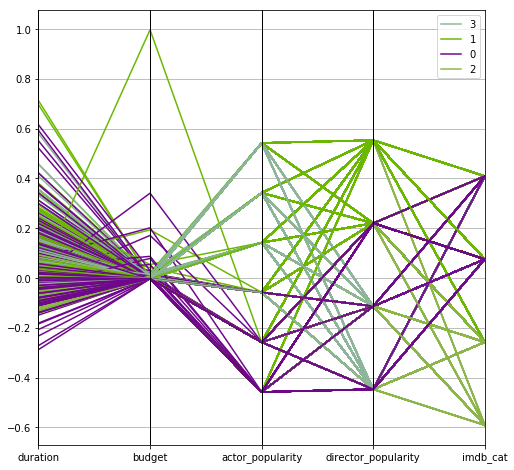

In [20]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,8))
parallel_coordinates(df2, 'cluster')

The clusters appear to be very diffirent when it comes to duration, actor popularity, and director popularity. However ther is not much variation in budget. This may be caused by a few outliers.

In [26]:
#show cluster means for each variable
df2.groupby(['cluster']).mean() 

,duration,budget,actor_popularity,director_popularity,imdb_cat
cluster,,,,,
0,-0.008240,-0.000833,-0.234375,-0.099927,0.113193
1,0.023741,0.001444,0.123946,0.357081,0.074274
2,-0.036868,-0.001247,-0.105656,-0.090111,-0.301208
3,0.014390,0.000239,0.204421,-0.284025,0.076241


In [28]:
#combine cluster data and original data
df3 = df.join(df1)
df3.head()

,duration,budget,actor_popularity,director_popularity,imdb_cat,cluster
0,178.0,237000000.0,3,1,3,3
1,169.0,300000000.0,6,4,3,1
2,148.0,245000000.0,4,1,3,3
3,164.0,250000000.0,6,4,4,1
4,132.0,263700000.0,3,3,3,1


In [29]:
df3.groupby(['cluster']).mean() 

,duration,budget,actor_popularity,director_popularity,imdb_cat
cluster,,,,,
0,106.687787,3.100545e+07,2.118457,2.041322,3.112948
1,116.602134,5.882208e+07,3.910061,3.412348,2.996189
2,97.813333,2.594908e+07,2.762051,2.070769,1.869744
3,113.703239,4.409508e+07,4.312435,1.489028,3.002090


* Cluster 0 has relatively average length movies, average budgets, low actor popularity, low director popularity and has a good IMDB score
* Cluster 1 has longer movies, a higher budget, relatively popular actors, relatively popular directors, and an between ok and good IMDB scores
* Cluster 2 has short movies, very low budgets, low actor popularity, low director poularity, and has bad IMDB scores
* Cluster 3 has longer movies, a high budget, very popular actors, unpopular directors, and a good IMDB scores

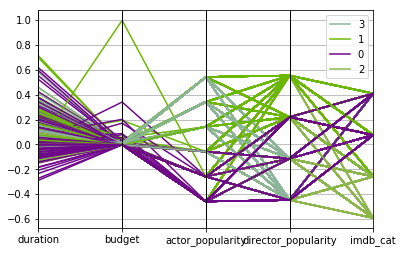

In [30]:
#visualize the cluster variance
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df2, 'cluster')

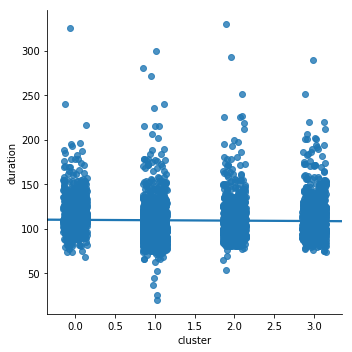

In [25]:
# visualize cluster and duration
sns.lmplot("cluster", "duration", df3, x_jitter=.15, y_jitter=.15)

Variations in duration cannot be seen visually because there is not much difference between clusters

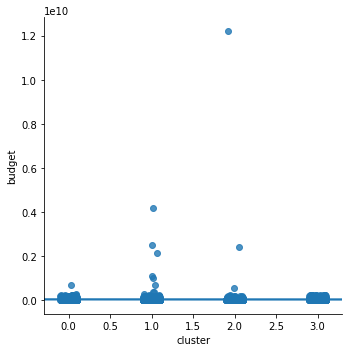

In [26]:
#visualize cluster and budget
sns.lmplot("cluster", "budget", df3, x_jitter=.1, y_jitter=.9)

Cluster 2 and 3 have higher bugets than 0 and 1.

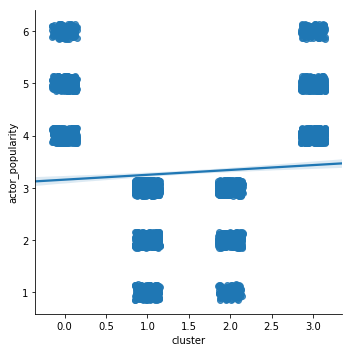

In [27]:
#visualize cluster and actor popularity
sns.lmplot("cluster", "actor_popularity", df3, x_jitter=.15, y_jitter=.15)

* Cluster 0 has high actor popularity
* Cluster 1 has low actor popularity
* Cluster 2 has low actor popularity
* Cluster 3 has high actor popularity

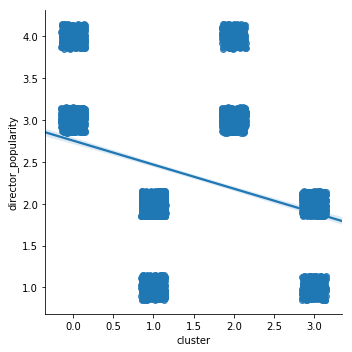

In [28]:
#visualize cluster and director popularity
sns.lmplot("cluster", "director_popularity", df3, x_jitter=.15, y_jitter=.15)

* Cluster 0 has high director popularity
* Cluster 1 has low director popularity
* Cluster 2 has high director popularity
* Cluster 3 has low director popularity

Text(0.5,0,'actor_popularity')

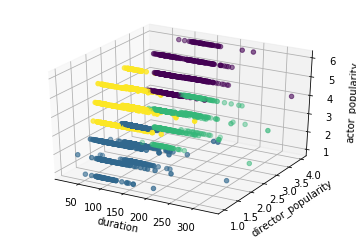

In [29]:
#visualize with a 3-D graph
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df3['duration']
y = df3['director_popularity']
z = df3['actor_popularity'] 
colors = df3['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('duration')
ax.set_ylabel('director_popularity')
ax.set_zlabel('actor_popularity')

Text(0.5,0,'director_popularity')

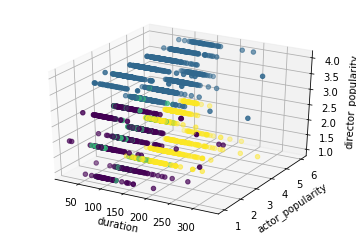

In [32]:
#visualize with a 3-D graph
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df3['duration']
y = df3['actor_popularity']
z = df3['director_popularity'] 
colors = df3['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('duration')
ax.set_ylabel('actor_popularity')
ax.set_zlabel('director_popularity')

### Decision Tree

A decision tree can be created to display cluster analysis

In [32]:
#assign x and y values
y = df2['cluster'].values
X = df2.drop(['cluster'], axis=1)

In [33]:
#preview x values
X.head()

,duration,budget,actor_popularity,director_popularity
0,0.221799,0.016030,-0.058066,-0.447034
1,0.192767,0.021188,0.541934,0.552966
2,0.125025,0.016685,0.141934,-0.447034
3,0.176638,0.017095,0.541934,0.552966
4,0.073412,0.018216,-0.058066,0.219632


In [34]:
#import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [35]:
# instantiate a decision tree model, and fit with X and y
model = DecisionTreeClassifier()

model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

1.0

In [36]:
#use decision tree to predict clusters
predicted_Y = model.predict(X)
print predicted_Y

[1 0 3 ... 1 1 1]


In [37]:
#import packages
from sklearn.externals.six import StringIO
import pydotplus

In [38]:
#export decision tree file
tree.export_graphviz(model, out_file='data/imdbclust1.dot', feature_names=X.columns)

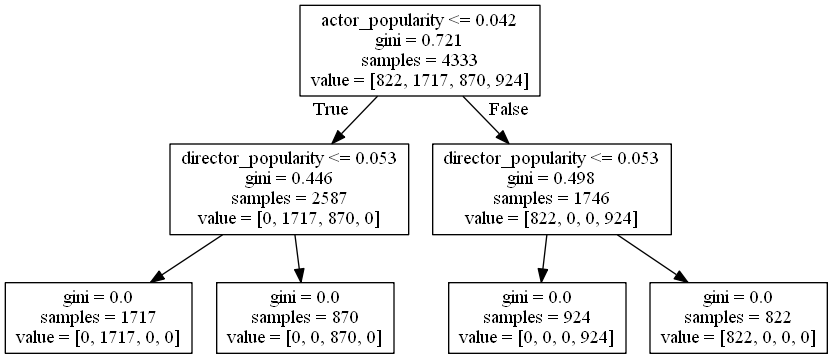

In [39]:
#import decision tree graph
from IPython.display import Image
Image("data/imdbclust1.png")

* This graph starts by splitting data into two clusters based on actor popularity scores
* Next it splits scores based on director popularity.

## Hiearchical Clustering

In [40]:
#import clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [41]:
#normalize data
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,duration,budget,actor_popularity,director_popularity
0,0.221799,0.016030,-0.058066,-0.447034
1,0.192767,0.021188,0.541934,0.552966
2,0.125025,0.016685,0.141934,-0.447034
3,0.176638,0.017095,0.541934,0.552966
4,0.073412,0.018216,-0.058066,0.219632


In [42]:
#run agglomerative classification
np.random.seed(1)

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([0, 3, 0, ..., 2, 2, 2], dtype=int64)

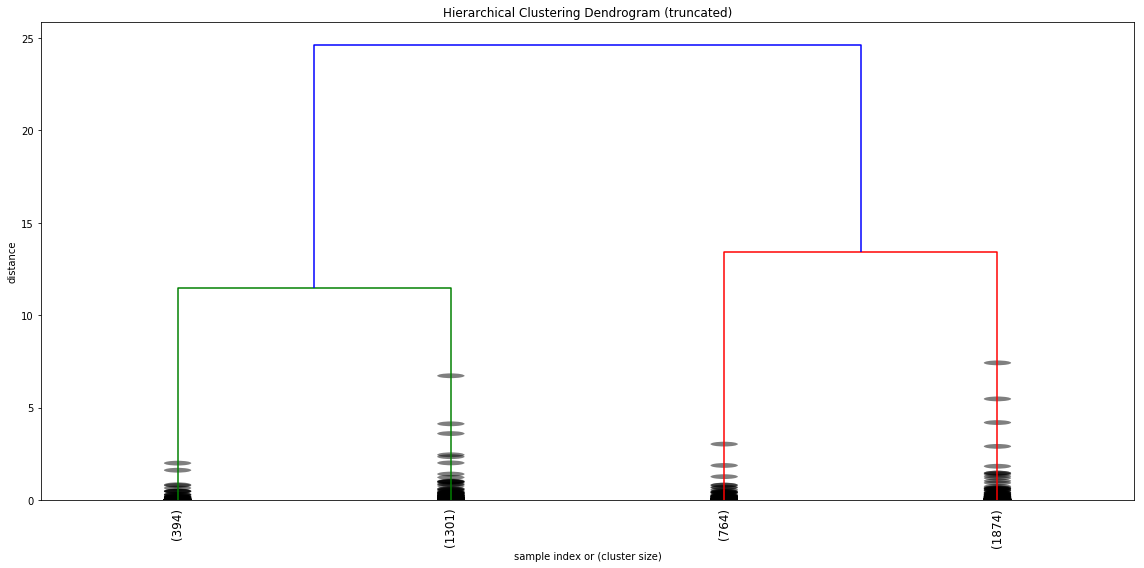

In [43]:
#Plot a dendogram
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

This dendogram shows the four distinct clusters that were created. There are two clusters that can be grouped by the green square and two that are grouped by the red square.

In [44]:
#Add cluster label into the dataset as a column
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,3
2,0
3,3
4,1


In [45]:
#Add cluster labels to original dataset
df2 = df.join(df1)
df2.head()

,duration,budget,actor_popularity,director_popularity,cluster
0,178.0,237000000.0,3,1,0
1,169.0,300000000.0,6,4,3
2,148.0,245000000.0,4,1,0
3,164.0,250000000.0,6,4,3
4,132.0,263700000.0,3,3,1


In [46]:
#group clusters by mean
df2.groupby('cluster').mean()

,duration,budget,actor_popularity,director_popularity
cluster,,,,
0,107.117930,3.554218e+07,3.736926,1.701174
1,113.486549,4.759738e+07,2.970792,3.305919
2,102.001309,3.180315e+07,1.704188,1.738220
3,119.373096,6.500254e+07,5.296954,3.368020


The duration of all three clusters are not very different
* Cluster 0 has a lower budget, popular actors, and unpopular directors
* Cluster 1 has a higher budget, low actor popularity, and a high director popularity
* Cluster 2 has a lower budget, low actor popularity, and low director popularity
* Cluster 3 has the longest movies, a high budget, high actor popularity, and high director popularity

In [47]:
#Check cluster size
df2.groupby('cluster').size()

cluster
0    1874
1    1301
2    764 
3    394 
dtype: int64

Cluster 1 has the most movies. Most movies have high budgets, low actor popularity and higher director popularity. Cluster 3 has the least amount of movies. Not very movies have high budgets as well as popular actors and directors.

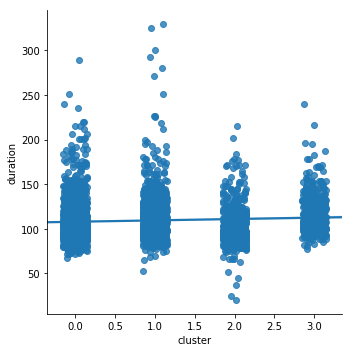

In [49]:
#visualize cluster and duration
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

There is not much difference in duration. Cluster 3 has a slightly longer duration.

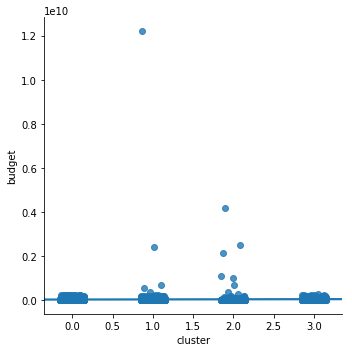

In [50]:
#visualize cluster and budget
sns.lmplot("cluster", "budget", df2, x_jitter=.15, y_jitter=.15)

Cluster 0 has the lowest budget and cluster 3 has the highest budget.

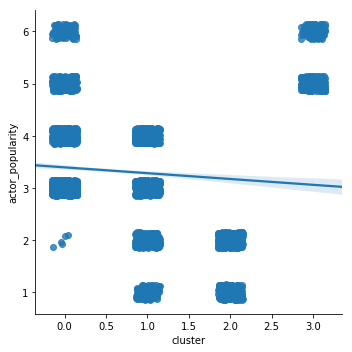

In [51]:
# visualize cluster and actor popularity
sns.lmplot("cluster", "actor_popularity", df2, x_jitter=.15, y_jitter=.15)

* Cluster 0 has high actor popularity
* Cluster 1 has average to low actor popularity
* Cluster 2 has low actor popularity
* Cluster 3 has very high actor popularity

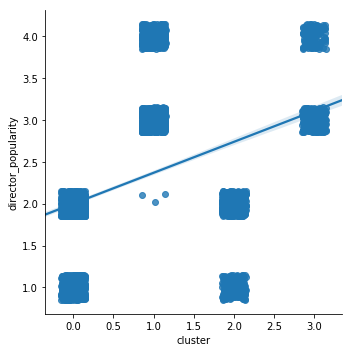

In [52]:
#visualize cluster and director popularity
sns.lmplot("cluster", "director_popularity", df2, x_jitter=.15, y_jitter=.15)

* Cluster 0 has low director popularity
* Cluster 1 has high director popularity
* Cluster 2 has low director popularity
* Cluster 3 has high director popularity

#### In this section clustering analysis demonstrated that most movies can be categorized simply by identifying actor and director popularity.